# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Collecting Data

In [2]:
import os

train_path = r'E:/NSUT/6th Sem/Operating System/os_project/dataset/Training/'
test_path = r'E:/NSUT/6th Sem/Operating System/os_project/dataset/Testing/'

path = os.listdir(train_path)
classes = {'no_tumor':0, 'pituitary_tumor':1} # TODO: Add two more classes i.e., glioma_tumor and meningioma_tumor.

# Resizeing data

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = train_path+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

# Converting data in numeric form

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
# Checking what are the sub arrays in our software. i,e. 0 - No Tummer , 1 - Tumor
np.unique(Y)

array([0, 1])

In [6]:
# Checking total number of sampeles in data set which are having Tummer and No Tummer
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
# Checking shape - this tells us Total number of samples and dimmention of samples
X.shape

(1222, 200, 200)

# VISUALISING DATA

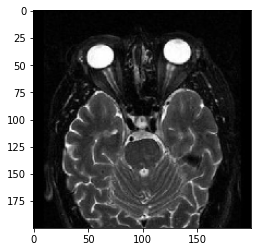

In [8]:
plt.imshow(X[1], cmap='gray')

# PREPARING DATA

In [9]:
# SK Learn works on 2 Dimensional data. But we had 3 Dimensional data above.
# So by reshaping it into 2 dimensional data we can continue
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Using Train - Test split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
# 977 sampels for Training the Data
# 245 samples for Testing the Data
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

# FEATURE SCALING

In [12]:
# We could have also used standard scaler and min max scaler
# But we used Feature scaler because the RGB value of an image ranges from 0-255
# So we devided the samples by 255
# That is why we are getting all outcomes in 0 or 1
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
# Principle Component Analisys (Data reduction algo.)
# reduce number of atributes without significant loss in info.
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


# Training Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

- Logistic Regression

In [16]:
# Training Model
# high C means "Trust this training data a lot", while a low value says 
#"This data may not be fully representative of the real world data, so if it's telling 
#you to make a parameter really large, don't listen to it"
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

- Support Vector Machines

In [17]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

- Random Forest

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(pca_train, ytrain)

RandomForestClassifier(random_state=10)

- K Nearest Neighbour

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain)

KNeighborsClassifier()

# Evaluation [Logistic Regression]

In [20]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


# Evaluation [SVM]

In [21]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


# Evaluation [Random Forest Classifier]

In [22]:
print("Training Score:", rf.score(pca_train, ytrain))
print("Testing Score:", rf.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9714285714285714


# Evaluation [K-Nearest Neighbors Classifier]

In [23]:
print("Training Score:", knn.score(pca_train, ytrain))
print("Testing Score:", knn.score(pca_test, ytest))

Training Score: 0.9488229273285568
Testing Score: 0.9428571428571428


## Deducing the best classifier

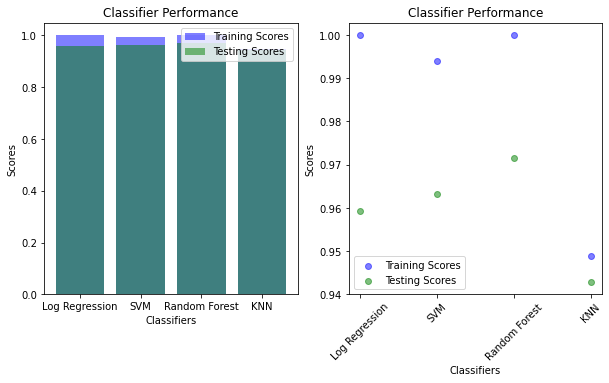

In [24]:
classifiers = ['Log Regression', 'SVM', 'Random Forest', 'KNN']
training_scores = [1.0, 0.9938587512794268, 1.0, 0.9488229273285568]
testing_scores = [0.9591836734693877, 0.963265306122449, 0.9714285714285714, 0.9428571428571428]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

x_pos = [i for i, _ in enumerate(classifiers)]
ax1.bar(x_pos, training_scores, color='blue', alpha=0.5, label='Training Scores')
ax1.bar(x_pos, testing_scores, color='green', alpha=0.5, label='Testing Scores')
ax1.set_xlabel('Classifiers')
ax1.set_ylabel('Scores')
ax1.set_title('Classifier Performance')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(classifiers)
ax1.legend()

ax2.scatter(classifiers, training_scores, color='blue', alpha=0.5, label='Training Scores')
ax2.scatter(classifiers, testing_scores, color='green', alpha=0.5, label='Testing Scores')
ax2.set_xlabel('Classifiers')
ax2.set_ylabel('Scores')
ax2.set_title('Classifier Performance')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

plt.show()

- Hence, we can see that **Random Forest** works with greater accuracy than rest here.

# Prediction

In [25]:
pred = rf.predict(pca_test)
np.where(ytest!=pred)

(array([  3,  49, 128, 139, 212, 227, 235], dtype=int64),)

# Test Model

In [26]:
dec = {0:'No Tumor', 1:'Positive Tumor'}#Classes

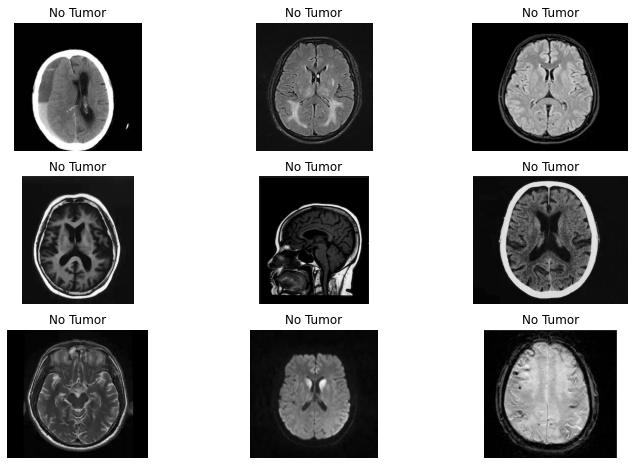

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir(test_path)
c=1
for i in os.listdir(test_path + '/no_tumor')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(test_path + '/no_tumor/'+i,0)
    if img is None:
        print('Wrong path:', path)
    else:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        p = rf.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c+=1

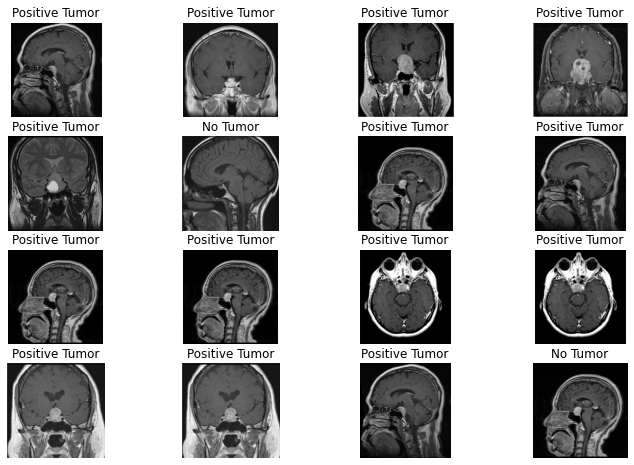

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir(test_path)
c=1
for i in os.listdir(test_path + 'pituitary_tumor')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread(test_path + 'pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1